#  Import Models

In [1]:
import sys
sys.path.append('../data')  # ✅ go from /notebook to /data

from data_loader import load_clean_data  # ✅ import the correct function

# 🔃 Load the data
df = load_clean_data()
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."


In [2]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."


## Add Text Length Feature

In [3]:
# Count number of words in clean_text list
df['text_length'] = df['clean_text'].apply(len)
df.head()

,label,text,clean_text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o...",20
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",25
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t...",11
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l...",13


#  Split the text and labels

In [4]:
from sklearn.model_selection import train_test_split

# Join clean words back into full sentences
X = df['clean_text'].apply(lambda x: ' '.join(x))
y = df['label']

# Split into train and test sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#  Vectorize with TF-IDF


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit on training text, transform both
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

# Create Models to Compare

Import Libraries

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

In [7]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


In [8]:
# Store results
results = []

# Loop through models
for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', model)
    ])
    
    pipeline.fit(X_train_text, y_train)
    y_pred = pipeline.predict(X_test_text)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='spam'),
        "Recall": recall_score(y_test, y_pred, pos_label='spam'),
        "F1 Score": f1_score(y_test, y_pred, pos_label='spam')
    })

# Show results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.962282   0.973214  0.751724  0.848249
1          Naive Bayes  0.945841   1.000000  0.613793  0.760684
2           Linear SVM  0.981625   0.963235  0.903448  0.932384
3        Decision Tree  0.948743   0.828571  0.800000  0.814035
4        Random Forest  0.966151   0.991071  0.765517  0.863813


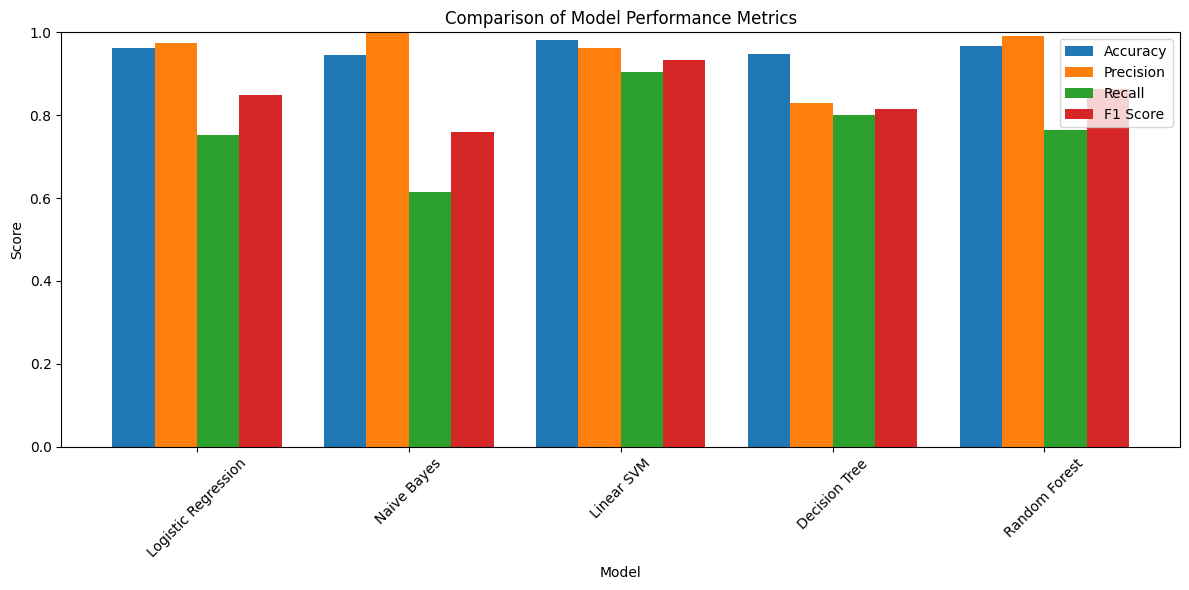

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create x locations for each model
x = np.arange(len(results_df['Model']))
width = 0.2  # Width of each bar

# Plot
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df[metric], width, label=metric)

# Labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(x + width * 1.5, results_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


# Step-by-Step Plan

🔁 Step 1: Cross-Validation (CV):

Use cross_val_score to check how stable your models are across different subsets of data.

🔍 Step 2: Select Top Models:

Based on F1 or Precision, pick the top 2–3 models for tuning (e.g., SVM, Random Forest, Logistic Regression).

🎯 Step 3: RandomizedSearchCV for Hyperparameter Tuning:

Tune those selected models using RandomizedSearchCV to find the best parameters efficiently.

📈 Step 4: Retrain + Evaluate:

Use the best hyperparameters, retrain, and compare results again.

# Cross-Validation :
using 5-fold CV for each model:

In [10]:
from sklearn.model_selection import cross_val_score

cv_results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', model)
    ])

    # 5-fold CV on training data
    scores = cross_val_score(pipeline, X_train_text, y_train, cv=5, scoring='f1_macro')
    cv_results.append({
        'Model': name,
        'Mean F1 (CV)': scores.mean(),
        'Std Dev': scores.std()
    })

cv_df = pd.DataFrame(cv_results)
print(cv_df)

                 Model  Mean F1 (CV)   Std Dev
0  Logistic Regression      0.887076  0.009537
1          Naive Bayes      0.818799  0.019640
2           Linear SVM      0.953228  0.006948
3        Decision Tree      0.886915  0.005659
4        Random Forest      0.902902  0.002850


# Conclusion:

Based on the cross-validation results, Linear SVM, Logistic Regression, and Random Forest achieved the highest average F1 scores with relatively low standard deviations. This indicates that their performance is both strong and consistent across folds, making them the best candidates for hyperparameter tuning using RandomizedSearchCV.


# RandomizedSearchCV for Hyperparameter Tuning:

In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        'clf__C': [0.01, 0.1, 1, 10]
    },
    "Linear SVM": {
        'clf__C': [0.01, 0.1, 1, 10]
    },
    "Random Forest": {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20]
    }
}

best_models = {}

# Run RandomizedSearchCV
for name in ['Logistic Regression', 'Linear SVM', 'Random Forest']:
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', models[name])
    ])
    
    search = RandomizedSearchCV(pipe, param_grids[name], n_iter=5, cv=3, scoring='f1_macro', random_state=42)
    search.fit(X_train_text, y_train)
    
    best_models[name] = search.best_estimator_
    #This block automatically finds the best parameters and stores them in best_models.
    print(f"{name} best params: {search.best_params_}")
    print(f"{name} best score: {search.best_score_}")

c:\Users\naren\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression best params: {'clf__C': 10}
Logistic Regression best score: 0.9411359542523372


c:\Users\naren\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear SVM best params: {'clf__C': 10}
Linear SVM best score: 0.9512599026801679
Random Forest best params: {'clf__n_estimators': 100, 'clf__max_depth': None}
Random Forest best score: 0.898923284066595


#  Conclusion :

We have now successfully tuned the best three models using RandomizedSearchCV. Each model has been optimized with the best hyperparameters. Let's now evaluate these tuned models on the test set to compare their final real-world performance.

# Evaluate Tuned Models on the Test Set

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Compare final tuned models on test set
final_results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test_text)
    final_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='spam'),
        "Recall": recall_score(y_test, y_pred, pos_label='spam'),
        "F1 Score": f1_score(y_test, y_pred, pos_label='spam')
    })

# Create a DataFrame
final_df = pd.DataFrame(final_results)
print(final_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.978723   0.942446  0.903448  0.922535
1           Linear SVM  0.982592   0.956835  0.917241  0.936620
2        Random Forest  0.970019   0.991379  0.793103  0.881226


#  Identify the best model

In [13]:
# Find the model with the highest F1 Score
best_row = final_df.loc[final_df['F1 Score'].idxmax()]
best_model_name = best_row['Model']
print("Best Model:", best_model_name)

# Get the actual model object from best_models
best_model = best_models[best_model_name]

Best Model: Linear SVM


# Conclusion:

Among all tuned models, Linear SVM performs the best overall with the highest accuracy (98.26%) and F1 score (93.66%), indicating strong and balanced performance on both spam and ham detection.


# Save the Best Model using joblib:
Let’s now save the best-performing model (Linear SVM) so that we can reuse it later without retraining.

In [18]:
import os
import joblib

# Go one directory up from "notebook" to access FlaskApp
model_dir = os.path.join('..', 'FlaskApp', 'model')
model_path = os.path.join(model_dir, 'best_spam_model.pkl')

# Ensure directory exists
os.makedirs(model_dir, exist_ok=True)

# Save the model
joblib.dump(best_models['Linear SVM'], model_path)

print(f"Model saved at: {model_path}")

Model saved at: ..\FlaskApp\model\best_spam_model.pkl


# Load the Saved Model

my model is here: spam_detection/FlaskApp/model/best_spam_model.pkl

and 

my notebook is here: spam_detection/notebook/03_final_model.ipynb

so, use the relative path shown by '..'



In [20]:
import joblib
import os

# Go up one level from notebook, then into FlaskApp/model
model_path = os.path.join('..', 'FlaskApp', 'model', 'best_spam_model.pkl')
model = joblib.load(model_path)

print("Model loaded successfully!")

Model loaded successfully!


# Predict on New Messages

In [22]:
# Sample messages to predict
messages = [
    "Congratulations! You've won a free ticket to Bahamas. Claim now!",
    "Hey, are we still meeting tomorrow?"
]

# Predict
predictions = model.predict(messages)

# Show results
for msg, label in zip(messages, predictions):
    print(f"'{msg}' ➡️ {label}")

'Congratulations! You've won a free ticket to Bahamas. Claim now!' ➡️ spam
'Hey, are we still meeting tomorrow?' ➡️ ham


# What You Did Just Now: creating FlaskApp directory

Local Deployment (aka local development server)

✅ This is local — it works only on your computer.

❌ Nobody else can access it on their phone or browser.

❌ Not suitable for real users or production use.


# Simple Analogy:
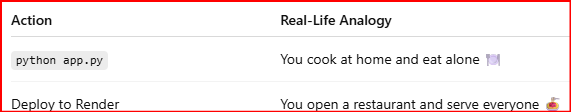


| Type              | Who can use it?    | Internet Needed? | Good for?           |
| ----------------- | ------------------ | ---------------- | ------------------- |
| **Local run**     | Only you (your PC) | ❌ Optional       | Testing & debugging |
| **Online deploy** | Anyone (worldwide) | ✅ Yes            | Real users, sharing |



# What’s Next? Online deploymetn ( access to everyone across the world)

### 🌐 What is Deployment?

✅ Deployment = Putting your app online so:

Anyone can visit it from anywhere (like a real website)

It's hosted on a web server (e.g., Render, Heroku, Hugging Face, AWS, etc.)

It uses a production WSGI server like gunicorn, not just python app.py



# Hosting Platforms / Deployment Platforms:
They let you host your Flask app so it runs on the web (online).

## Common Tools for Deployment (Deployment Platforms)
| Platform         | Type                  | Free Plan?      | Best For                                    |
| ---------------- | --------------------- | --------------- | ------------------------------------------- |
| **Render**       | Web App Hosting       | ✅ Yes           | Python Flask apps (easy setup)              |
| **Hugging Face** | ML App Hosting        | ✅ Yes           | Data science, ML demos                      |
| **Heroku**       | Web Hosting (Pausing) | ⚠️ Limited      | Flask/Node apps (but now limited free tier) |
| **Vercel**       | Frontend Hosting      | ⚠️ JS only      | React/Next.js apps only                     |
| **AWS EC2**      | Cloud Server          | ⚠️ Free trial   | Full control, complex setup                 |
| **Google Cloud** | Cloud Platform        | ⚠️ Free credits | Enterprise-level apps                       |


# Why Deployment Using Render?

Render.com — easiest for Flask + free

✅ No setup headache

✅ Works with GitHub

✅ Supports Flask natively

✅ Free tier (web service, auto-redeploy)